In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from create_data.read_data import process_data

In [2]:
import pandas as pd
from create_data.read_data import process_data

def run_process_data():
    meses = ['01_Enero','02_Febrero','03_Marzo','04_Abril','05_Mayo','06_Junio','07_Julio','08_Agosto','09_Septiembre']
    results = []
    for month_str in meses:
        result = process_data(month_str)
        results.append(result)
    concatenated_result = pd.concat(results, ignore_index=True)
    return concatenated_result


In [3]:
data = run_process_data()

In [4]:
data.head()

,DIRECTORIO,SECUENCIA_P,ORDEN,PT,POB_MAY18,P3271,P6040,P6050,P6083,P6081,...,P5222S7,P5222S8,P5222S8A1,P5222S9,P5222S10,P6008,DPTO,AREA,CLASE,Occupation_Status
0,7309060,1,2,1,1.0,1,27,2,2,2,...,NaN,NaN,NaN,NaN,NaN,3,25,NaN,1,0
1,7309064,1,3,1,1.0,1,18,3,1,2,...,NaN,NaN,NaN,NaN,NaN,5,66,NaN,2,0
2,7309067,1,2,1,1.0,2,25,3,2,1,...,NaN,NaN,NaN,NaN,NaN,2,66,NaN,2,0
3,7309071,1,2,1,1.0,2,28,2,2,2,...,NaN,NaN,NaN,NaN,NaN,3,66,NaN,2,0
4,7309073,1,3,1,1.0,2,27,3,1,2,...,NaN,NaN,NaN,NaN,NaN,6,66,NaN,2,0


In [5]:
data.shape

(114113, 48)

In [6]:
data['Occupation_Status'].value_counts()

Occupation_Status
1    77763
0    36350
Name: count, dtype: int64

In [7]:
def replace_values(df, column, mapping):
    df[column] = df[column].replace(mapping)
    return df

In [8]:
## Cambios de valor codificado
cambios ={
'P3271': {1: 'Masculino', 2: 'Femenino'},
'P6050': {1: 'Jefe del Hogar', 2: 'Pareja, esposo(a), conyugue, compañero(a)',
                 3: 'Hijo(a), hijastro(a)', 4: 'Padre o madre',5:'Suegro(a)',
                 6: 'Hermano(a), hermanastro(a)', 7: 'Yerno o nuera', 8: 'Nieto', 9: 'Otro pariente',
                 10: 'Empleado(a) del servicio doméstico y sus parientes',
                 11: 'Pensionista', 12: 'Trabajador', 13: 'Otro no pariente'},
'P6083': {1: 'Si', 2: 'No', 3: 'Fallecida'},
'P6081': {1: 'Si', 2: 'No', 3: 'Fallecido'},
'P2057': {1: 'Si', 2: 'No', 9: 'No informa'},
'P2059': {1: 'Si', 2: 'No', 9: 'No informa'},
'P2061': {1: 'Si', 2: 'No', 9: 'No informa'},
'P6080': {1: 'Indígena', 2: 'Gitano (ROM)', 3: 'Raizal del Archipiélago',
                  4: 'Palenquero', 5: 'Negro, mulato (afrodescendiente)',
                  6: 'Ninguno de los anteriores'},
'P6070': {1: "No esta casado(a) y vive en pareja  hace  menos de dos años",
                  2: "No esta  casado (a)  y vive en pareja   hace dos años  o más",
                  3: "Esta casado (a)",
                  4: "Esta separado (a) o divorciado (a)",
                  5: "Esta viudo (a)",
                  6: "Esta soltero (a)"},
'P6160': {1: "Si", 2: 'No'},
'P6170': {1: "Si", 2: 'No'},
'P3042': {1: 'Ninguno',
          2: 'Preescolar ',
          3: 'Básica primaria (1o - 5o)',
          4: 'Básica secundaria (6o - 9o)',
          5: 'Media académica (Bachillerato clásico)',
          6: 'Media técnica (Bachillerato técnico)',
          7: 'Normalista',
          8: 'Técnica profesional',
          9: 'Tecnológica ',
          10: 'Universitaria',
          11: 'Especialización ',
          12: 'Maestría ',
          13: 'Doctorado ',
          99: 'No sabe, no informa'},
'P3039': {1: 'Hombre',
          2: 'Mujer',
          3: 'Hombre trans',
          4: 'Mujer trans',
          5: 'Otro'},
'P4000':{1: 'Casa',
         2: 'Apartamento',
         3: 'Cuarto (s) en inquilinato',
         4: 'Cuarto (s) en otro  tipo de estructura',
         5: 'Vivienda indígena',
         6: 'Otra vivienda (carpa,  vagón, embarcación, cueva, refugio natural, etc.)'},
'P4030S1': {1: "Si", 2: 'No'},
'P4030S2': {1: "Si", 2: 'No'},
'P4030S3': {1: "Si", 2: 'No'},
'P4030S4': {1: "Si", 2: 'No'},
'P4030S5': {1: "Si", 2: 'No'},
'DPTO': {5: 'ANTIOQUIA',
         8: 'ATLANTICO',
         11: 'BOGOTA',
         13: 'BOLIVAR',
         15: 'BOYACA',
         17: 'CALDAS',
         18: 'CAQUETA',
         19: 'CAUCA',
         20: 'CESAR',
         23: 'CORDOBA',
         25: 'CUNDINAMARCA',
         27: 'CHOCO',
         41: 'HUILA',
         44: 'LA GUAJIRA',
         47: 'MAGDALENA',
         50: 'META',
         52: 'NARIÑO',
         54: 'NORTE DE SANTANDER',
         63: 'QUINDIO',
         66: 'RISALRALDA',
         68: 'SANTANDER',
         70: 'SUCRE',
         73: 'TOLIMA',
         76: 'VALLE',
         81: 'ARAUCA',
         85: 'CASANARE',
         86: 'PUTUMAYO',
         88: 'SAN ANDRES',
         91: 'AMAZONAS',
         94: 'GUAINIA',
         95: 'GUAVIARE',
         97: 'VAUPES',
         99: 'VICHADA'},
'CLASE': {1: 'Cabecera', 2: 'Resto'},
'P4030S1A1': {0: 'Conexión Pirata',
              1: 'Bajo - Bajo',
              2: 'Bajo',
              3: 'Medio - Bajo',
              4: 'Medio',
              5: 'Medio - Alto',
              6: 'Alto',
              9: 'No sabe o cuenta con planta eléctrica'},
}

In [9]:
for col in cambios.keys():
    data = replace_values(data, col, cambios[col])

In [10]:
data.columns = ['DIRECTORIO','SECUENCIA_P','ORDEN','PT','POB_MAY18','SEXO_PERSONA','EDAD','PARENTESCO','MADRE_RESIDE_HOGAR','PADRE_RESIDE_HOGAR',
                'ES_CAMPESINO','ALGUNA_VEZ_CAMPESINO','VIVE_COMUNIDAD_CAMPESINA','ETNIA','ESTADO_CIVIL','SABE_LEER_Y_ESCRIBIR','SE_ENCUENTRA_ESTUDIANDO',
                'INSTITUCION','MAYOR_NIVEL_EDUCATIVO_ALCANZADO','MAYOR_GRADO_ALCANZADO','ULTIMO_DIPLOMA_RECIBIDO','EN_QUE_RECIBIO_DIPLOMA',
                'IDENTIDAD_GENERO','PERIODO','HOGAR','TIPO_DE_VIVIENDA','ENERGIA_ELECTRICA','ESTRATO_ENERGIA','GAS_NATURAL','ALCANTARILLADO',
                'RECOLECCION_DE_BASURAS','ACUEDUCTO','P5222S1','P5222S2', 'P5222S3', 'P5222S4', 'P5222S5', 'P5222S6', 'P5222S7','P5222S8',
                'P5222S8A1', 'P5222S9', 'P5222S10','NUM_PERSONAS_HOGAR','DPTO','AREA','ZONA','Occupation_Status']

In [11]:
# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100

# Get the columns with missing values greater than or equal to 1%
columns_to_drop = missing_percentage[missing_percentage >= 1].index

# Drop the columns from the dataframe
data = data.drop(columns=columns_to_drop)

In [12]:
data.shape

(114113, 31)

In [13]:
data_analisis = data.drop(columns=['PERIODO','DIRECTORIO','SECUENCIA_P','ORDEN','PT','POB_MAY18','HOGAR'])

In [14]:
data_analisis.columns

Index(['SEXO_PERSONA', 'EDAD', 'PARENTESCO', 'MADRE_RESIDE_HOGAR',
       'PADRE_RESIDE_HOGAR', 'ES_CAMPESINO', 'VIVE_COMUNIDAD_CAMPESINA',
       'ETNIA', 'ESTADO_CIVIL', 'SABE_LEER_Y_ESCRIBIR',
       'SE_ENCUENTRA_ESTUDIANDO', 'MAYOR_NIVEL_EDUCATIVO_ALCANZADO',
       'IDENTIDAD_GENERO', 'TIPO_DE_VIVIENDA', 'ENERGIA_ELECTRICA',
       'ESTRATO_ENERGIA', 'GAS_NATURAL', 'ALCANTARILLADO',
       'RECOLECCION_DE_BASURAS', 'ACUEDUCTO', 'NUM_PERSONAS_HOGAR', 'DPTO',
       'ZONA', 'Occupation_Status'],
      dtype='object')

In [15]:
data_analisis.head()

,SEXO_PERSONA,EDAD,PARENTESCO,MADRE_RESIDE_HOGAR,PADRE_RESIDE_HOGAR,ES_CAMPESINO,VIVE_COMUNIDAD_CAMPESINA,ETNIA,ESTADO_CIVIL,SABE_LEER_Y_ESCRIBIR,...,ENERGIA_ELECTRICA,ESTRATO_ENERGIA,GAS_NATURAL,ALCANTARILLADO,RECOLECCION_DE_BASURAS,ACUEDUCTO,NUM_PERSONAS_HOGAR,DPTO,ZONA,Occupation_Status
0,Masculino,27,"Pareja, esposo(a), conyugue, compañero(a)",No,No,Si,Si,Ninguno de los anteriores,No esta casado (a) y vive en pareja hace d...,Si,...,Si,Bajo,No,Si,Si,Si,3,CUNDINAMARCA,Cabecera,0
1,Masculino,18,"Hijo(a), hijastro(a)",Si,No,Si,Si,Ninguno de los anteriores,Esta soltero (a),Si,...,Si,Bajo - Bajo,Si,No,Si,Si,5,RISALRALDA,Resto,0
2,Femenino,25,"Hijo(a), hijastro(a)",No,Si,Si,Si,Ninguno de los anteriores,Esta soltero (a),Si,...,Si,Bajo - Bajo,Si,No,Si,Si,2,RISALRALDA,Resto,0
3,Femenino,28,"Pareja, esposo(a), conyugue, compañero(a)",No,No,No,No,Ninguno de los anteriores,No esta casado (a) y vive en pareja hace d...,Si,...,Si,Bajo - Bajo,Si,No,Si,Si,3,RISALRALDA,Resto,0
4,Femenino,27,"Hijo(a), hijastro(a)",Si,No,Si,Si,Ninguno de los anteriores,Esta soltero (a),Si,...,Si,Bajo - Bajo,Si,No,Si,Si,6,RISALRALDA,Resto,0


In [16]:
data_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114113 entries, 0 to 114112
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   SEXO_PERSONA                     114113 non-null  object
 1   EDAD                             114113 non-null  int64 
 2   PARENTESCO                       114113 non-null  object
 3   MADRE_RESIDE_HOGAR               114113 non-null  object
 4   PADRE_RESIDE_HOGAR               114113 non-null  object
 5   ES_CAMPESINO                     114113 non-null  object
 6   VIVE_COMUNIDAD_CAMPESINA         114113 non-null  object
 7   ETNIA                            114113 non-null  object
 8   ESTADO_CIVIL                     114113 non-null  object
 9   SABE_LEER_Y_ESCRIBIR             114113 non-null  object
 10  SE_ENCUENTRA_ESTUDIANDO          114113 non-null  object
 11  MAYOR_NIVEL_EDUCATIVO_ALCANZADO  114113 non-null  object
 12  IDENTIDAD_GENERO

# Exploración y Selección de Variables cualitativas
- Information Value
- Prueba Chi2 de Linealidad
- Feature Importance

In [17]:
categoric = data_analisis.select_dtypes(include=['category','object']).columns
categorical = data_analisis[list(categoric) + ['Occupation_Status']]
categorical.columns

Index(['SEXO_PERSONA', 'PARENTESCO', 'MADRE_RESIDE_HOGAR',
       'PADRE_RESIDE_HOGAR', 'ES_CAMPESINO', 'VIVE_COMUNIDAD_CAMPESINA',
       'ETNIA', 'ESTADO_CIVIL', 'SABE_LEER_Y_ESCRIBIR',
       'SE_ENCUENTRA_ESTUDIANDO', 'MAYOR_NIVEL_EDUCATIVO_ALCANZADO',
       'IDENTIDAD_GENERO', 'TIPO_DE_VIVIENDA', 'ENERGIA_ELECTRICA',
       'ESTRATO_ENERGIA', 'GAS_NATURAL', 'ALCANTARILLADO',
       'RECOLECCION_DE_BASURAS', 'ACUEDUCTO', 'DPTO', 'ZONA',
       'Occupation_Status'],
      dtype='object')

In [18]:
from data_module.visualizacion import grafico_frecuencia_acumulada

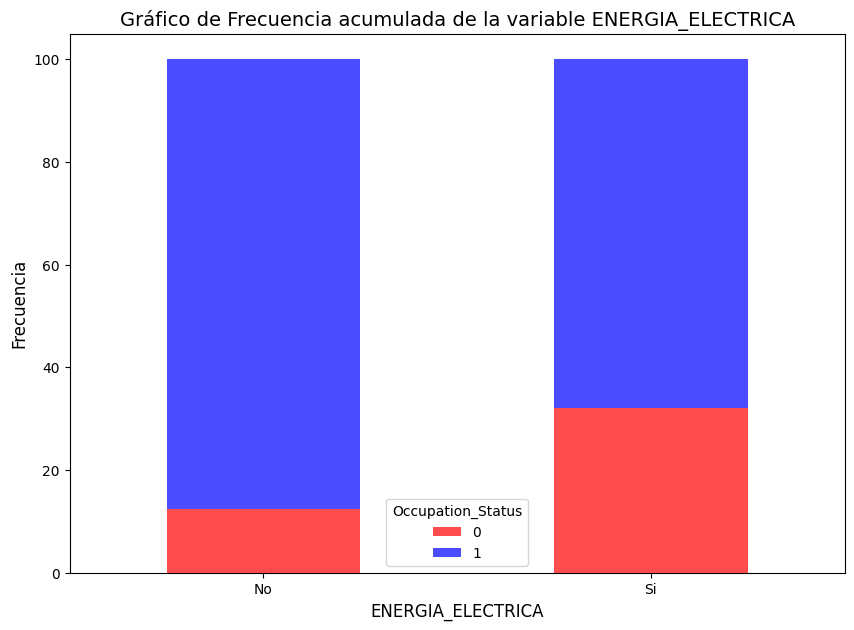

In [19]:
grafico_frecuencia_acumulada(data=data_analisis, categorical='ENERGIA_ELECTRICA', target='Occupation_Status', 
                             title = 'Gráfico de Frecuencia acumulada de la variable ENERGIA_ELECTRICA', colors=['#FF0000','#0000FF'],
                             x_axis_rotation=0)

In [20]:
from data_module.pruebas import calculate_woe_iv

In [21]:
iv_df = pd.DataFrame(columns=['IV'])

# Calculate WOE and IV for each variable in the categorical dataframe
for column in categorical.columns:
    if column != 'Occupation_Status':
        woe, iv = calculate_woe_iv(categorical, column, 'Occupation_Status')
        sum_iv = sum([i for i in iv.values()])
        iv_df.loc[column, 'IV'] = sum_iv

# Display the resulting dataframe
print("Resultados del Cálculo de IV")
display(iv_df.sort_values(by='IV', ascending=False))

print("Variables con IV mayor a 0.02, es decir, predictores aceptables")
display(iv_df[iv_df['IV'] > 0.02].sort_values(by='IV', ascending=False))

iv_columns = list(iv_df[iv_df['IV'] > 0.02].sort_values(by='IV', ascending=False).index)[:5]

Resultados del Cálculo de IV


,IV
ZONA,0.110287
VIVE_COMUNIDAD_CAMPESINA,0.089632
RECOLECCION_DE_BASURAS,0.077287
DPTO,0.072584
ES_CAMPESINO,0.048288
TIPO_DE_VIVIENDA,0.0363
ALCANTARILLADO,0.031306
ESTRATO_ENERGIA,0.025952
ACUEDUCTO,0.019394
MAYOR_NIVEL_EDUCATIVO_ALCANZADO,0.016082


Variables con IV mayor a 0.02, es decir, predictores aceptables


,IV
ZONA,0.110287
VIVE_COMUNIDAD_CAMPESINA,0.089632
RECOLECCION_DE_BASURAS,0.077287
DPTO,0.072584
ES_CAMPESINO,0.048288
TIPO_DE_VIVIENDA,0.0363
ALCANTARILLADO,0.031306
ESTRATO_ENERGIA,0.025952


In [22]:
from data_module.pruebas import chi2_test_of_normality

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical.drop(columns='Occupation_Status'))

# Create the decision tree classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(categorical_encoded, categorical['Occupation_Status'])

# Calculate feature importance
feature_importance = tree.feature_importances_

In [24]:
# Create a dataframe to store the feature importance
feature_importance_df = pd.DataFrame({'Variable': encoder.get_feature_names_out(categorical.drop(columns='Occupation_Status').columns),
                                      'Feature Importance': feature_importance})

# Display the dataframe
display(feature_importance_df.sort_values(by='Feature Importance', ascending=False)[:10])

,Variable,Feature Importance
48,MAYOR_NIVEL_EDUCATIVO_ALCANZADO_Media académic...,0.032201
119,ZONA_Cabecera,0.029849
19,PADRE_RESIDE_HOGAR_No,0.029319
55,MAYOR_NIVEL_EDUCATIVO_ALCANZADO_Técnica profes...,0.025498
5,PARENTESCO_Jefe del Hogar,0.025331
42,SE_ENCUENTRA_ESTUDIANDO_Si,0.024643
56,MAYOR_NIVEL_EDUCATIVO_ALCANZADO_Universitaria,0.024096
41,SE_ENCUENTRA_ESTUDIANDO_No,0.024059
44,MAYOR_NIVEL_EDUCATIVO_ALCANZADO_Básica secunda...,0.023117
20,PADRE_RESIDE_HOGAR_Si,0.023038


In [25]:
feature_importance_df['VAR'] = feature_importance_df['Variable'].apply(lambda x: '_'.join(x.split('_')[:-1]))

In [26]:
result_fi = feature_importance_df.groupby('VAR')['Feature Importance'].mean().sort_values(ascending=False)


In [27]:
result_fi

VAR
PADRE_RESIDE_HOGAR                 0.024915
SE_ENCUENTRA_ESTUDIANDO            0.024351
MADRE_RESIDE_HOGAR                 0.018327
SEXO_PERSONA                       0.017272
ZONA                               0.014925
ESTADO_CIVIL                       0.013457
GAS_NATURAL                        0.013131
ES_CAMPESINO                       0.012912
MAYOR_NIVEL_EDUCATIVO_ALCANZADO    0.011191
PARENTESCO                         0.009551
IDENTIDAD_GENERO                   0.009527
ALCANTARILLADO                     0.007555
ESTRATO_ENERGIA                    0.006856
ACUEDUCTO                          0.006281
ETNIA                              0.004593
RECOLECCION_DE_BASURAS             0.004380
DPTO                               0.004056
TIPO_DE_VIVIENDA                   0.003605
VIVE_COMUNIDAD_CAMPESINA           0.002511
SABE_LEER_Y_ESCRIBIR               0.001711
ENERGIA_ELECTRICA                  0.000195
Name: Feature Importance, dtype: float64

In [28]:
fi_columns = list(result_fi[:5].index)

In [29]:
categorical_columns = list(set(fi_columns).union(set(iv_columns)))

In [30]:
categorical_columns

['PADRE_RESIDE_HOGAR',
 'VIVE_COMUNIDAD_CAMPESINA',
 'ZONA',
 'RECOLECCION_DE_BASURAS',
 'SE_ENCUENTRA_ESTUDIANDO',
 'SEXO_PERSONA',
 'DPTO',
 'ES_CAMPESINO',
 'MADRE_RESIDE_HOGAR']

# Exploración y Selección de variables cuantitativas

In [31]:
numeric = data_analisis.select_dtypes(include='number').columns
numerical = data_analisis[list(numeric)]
numerical.head()

,EDAD,NUM_PERSONAS_HOGAR,Occupation_Status
0,27,3,0
1,18,5,0
2,25,2,0
3,28,3,0
4,27,6,0


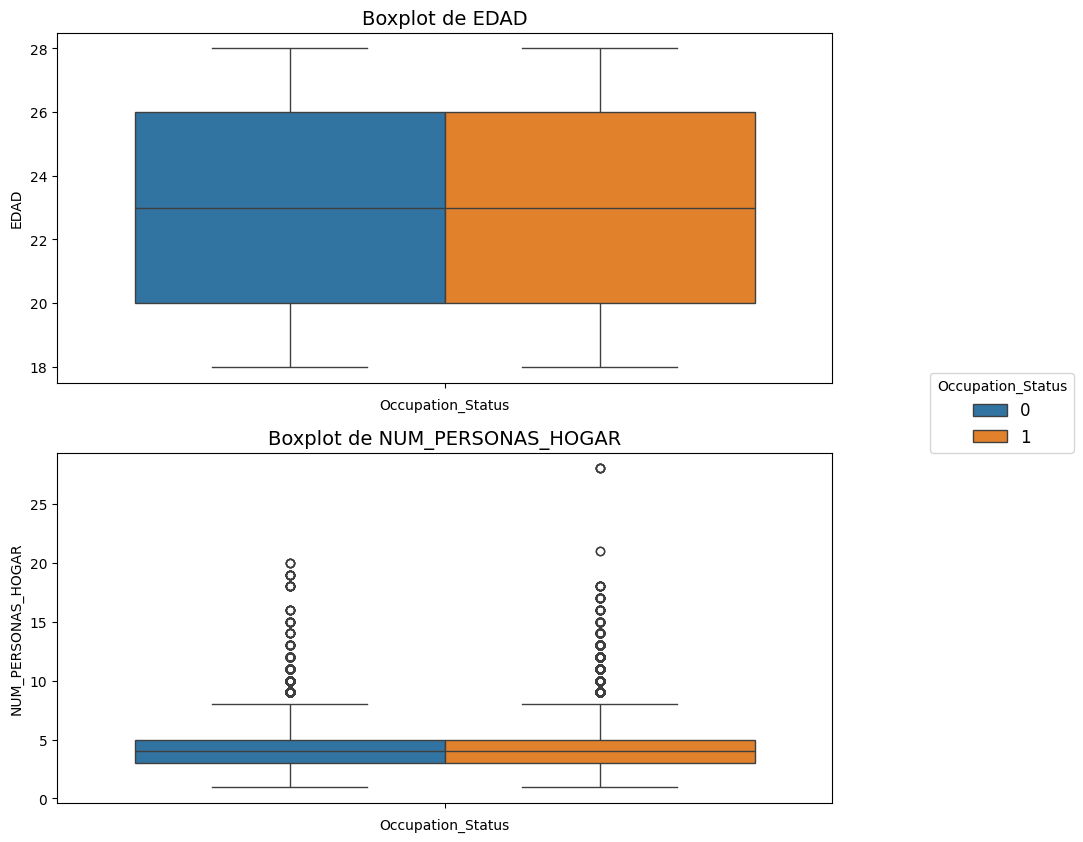

In [32]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=len(numeric)-1, figsize=(10,10))

# Iterate over each variable in numeric
for i, variable in enumerate(numeric):
    if variable != 'Occupation_Status':

        # Create a boxplot with Occupation_Status as the hue
        sns.boxplot(y=variable, hue='Occupation_Status', data=data_analisis, ax=axes[i])

    # Set the title and labels
        axes[i].set_title(f'Boxplot de {variable}', fontsize = 14)
        axes[i].set_ylabel(variable)
        axes[i].set_xlabel('Occupation_Status')
        axes[i].legend().remove()

# Adjust the spacing between subplots
#plt.tight_layout()

# Create a common legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1, title = 'Occupation_Status', fontsize = 12)

# Show the plot
plt.show()



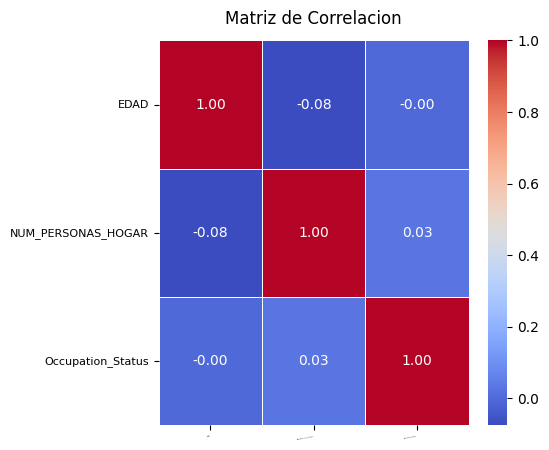

In [33]:
# Calculate the correlation matrix
correlation_matrix = numerical.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacion', fontdict={'fontsize': 12}, pad=12)
plt.xticks(rotation=10, fontsize=0, horizontalalignment='right')
plt.yticks(rotation=0, fontsize=8)
plt.show()


In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

seleccion = SelectKBest(f_classif, k='all').    fit(numerical.fillna(0), categorical['Occupation_Status'])


c:\Users\andre\OneDrive\Documentos\Encuesta Integrada de Hogares\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [35]:
display(seleccion.scores_)
display(seleccion.get_feature_names_out())


array([ 0.92995286, 74.31774688,         inf])

array(['EDAD', 'NUM_PERSONAS_HOGAR', 'Occupation_Status'], dtype=object)

In [36]:
numeric_columns = ['NUM_PERSONAS_HOGAR']
target = 'Occupation_Status'

In [37]:
final_columns = categorical_columns + numeric_columns

In [38]:
X = data_analisis[final_columns]
y = data_analisis[target]

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y, shuffle=True)

In [40]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_transformer= Pipeline (steps=[
('imputer', SimpleImputer(strategy='mean') ),
('scaler', StandardScaler())
])

categorical_transformer_num= Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [41]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
     ('numeric', numerical_transformer, numeric_columns), # Auí para cada uno definimos el nombre del proceso, el proceso y en donde vamos a aplicarlo (Columnas)
     ('categ', categorical_transformer_num, categorical_columns),
    ]
)


In [42]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_preprocessed_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

In [43]:
# Regresíon Logística
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42, max_iter=100)
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Arbol de Decisión
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_params = {
    'max_depth': range(2, 15),
    'min_samples_split': range(2, 10),
    'criterion': ['gini', 'entropy']
}

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_params = {
    'n_neighbors': range(2, 15),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [46]:
# Evaluación modelo logístico

modelo_logistico = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
modelo_logistico.fit(X_train_preprocessed_smote, y_train_smote)
display(modelo_logistico.best_params_)
display(modelo_logistico.best_score_)

y_pred = modelo_logistico.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

print("Resultados de las métricas de evaluación")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1:", f1_score(y_test, y_pred, average='macro'))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, colorbar=False)
plt.title('Matriz de Confusión')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label = "Modelo" + ' (AUC = {:.4f})'.format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.title('Curva ROC')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlabel('Tasa de Falsos Positivos')
plt.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\andre\OneDrive\Documentos\Encuesta Integrada de Hogares\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 10}

0.5779215560199324

              precision    recall  f1-score   support

           0       0.38      0.59      0.47      7270
           1       0.75      0.56      0.64     15553

    accuracy                           0.57     22823
   macro avg       0.56      0.57      0.55     22823
weighted avg       0.63      0.57      0.58     22823

Resultados de las métricas de evaluación


ValueError: pos_label=Masculino is not a valid label. It should be one of [0, 1]

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


{'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 2}

0.5919064459090179

              precision    recall  f1-score   support

           0       0.38      0.70      0.49      7270
           1       0.76      0.46      0.58     15553

    accuracy                           0.54     22823
   macro avg       0.57      0.58      0.53     22823
weighted avg       0.64      0.54      0.55     22823



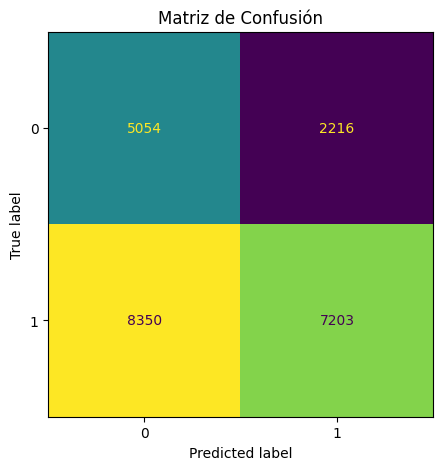

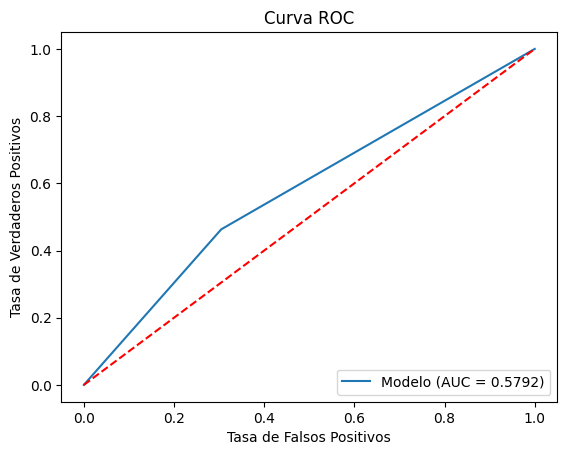

In [ ]:
# Evaluación modelo árbol de decisión

modelo_tree = GridSearchCV(tree_model, tree_params, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
modelo_tree.fit(X_train_preprocessed_smote, y_train_smote)
display(modelo_tree.best_params_)
display(modelo_tree.best_score_)

y_pred = modelo_tree.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

print("Resultados de las métricas de evaluación")
display(pd.DataFrame({'Precision': precision_score(y_test, y_pred, pos_label='Masculino'),
                      'Recall': recall_score(y_test, y_pred, pos_label='Masculino'),
                      'F1': f1_score(y_test, y_pred, pos_label='Masculino')}, index=['Masculino']))
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, colorbar=False)
plt.title('Matriz de Confusión')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label = "Modelo" + ' (AUC = {:.4f})'.format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.title('Curva ROC')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlabel('Tasa de Falsos Positivos')
plt.show()

In [ ]:
# Evaluación modelo KNN

modelo_knn = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy', verbose=5, n_jobs=-1)
modelo_knn.fit(X_train_preprocessed_smote, y_train_smote)
display(modelo_knn.best_params_)
display(modelo_knn.best_score_)

y_pred = modelo_knn.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

print("Resultados de las métricas de evaluación")
display(pd.DataFrame({'Precision': precision_score(y_test, y_pred, pos_label='Masculino'),
                      'Recall': recall_score(y_test, y_pred, pos_label='Masculino'),
                      'F1': f1_score(y_test, y_pred, pos_label='Masculino')}, index=['Masculino']))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, colorbar=False)
plt.title('Matriz de Confusión')
plt.show()


# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label = "Modelo" + ' (AUC = {:.4f})'.format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.title('Curva ROC')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlabel('Tasa de Falsos Positivos')
plt.show()

Fitting 5 folds for each of 52 candidates, totalling 260 fits


In [ ]:
from joblib import dump

dump(modelo_logistico.best_estimator_, 'models\modelo_logistico.joblib') 
dump(modelo_tree.best_estimator_, 'models\modelo_tree.joblib') 

dump(preprocessor, 'models\preprocessor.joblib') 